# Notebook

The purpose of this notebook is to detail the data science methodology used to produce classification (i.e., yes/no) predictions of high-latitude ionospheric phase scintillation. 

The reference for this work is: [McGranaghan, R.M., A.J. Mannucci, B.D Wilson, C.A. Mattmann, and R. Chadwick. (2018), New capabilities for prediction of high‐latitude ionospheric scintillation: A novel approach with machine learning, Space Weather, 16](https://doi.org/10.1029/2018SW002018).

## Abstract
As societal dependence on trans-ionospheric radio signals grows, understanding the impact of space weather on these signals is both increasingly important and remains unresolved. The challenge is particularly acute at high-latitudes where the effects of space weather are most direct and no reliable predictive capability exists. We take advantage of a large volume of data from Global Navigation Satellite Systems (GNSS) signals, increasingly sophisticated tools for data-driven discovery, and a machine learning algorithm known as the Support Vector Machine (SVM) to develop a novel predictive model for high-latitude ionospheric phase scintillation. This work, to our knowledge, represents the first time a SVM model has been created to predict high-latitude phase scintillation. We define a metric known as the Total Skill Score (TSS), which can be used to robustly compare between predictive methods, to evaluate the SVM model, thereby establishing a benchmark for high-latitude ionospheric phase scintillation. We find that the SVM model significantly outperforms persistence, doubling the predictive skill according to the TSS for a one hour predictive task. The increase in is even more pronounced as prediction time is increased. For a prediction time of three hours, persistence prediction is comparable to a random chance prediction, suggesting that the 'memory' of the ionosphere in terms of high-latitude plasma irregularities is on the order of or shorter than hours. The SVM model predictive skill only slightly decreases between the one and three hour predictive task, pointing to the potential of this method. Our findings can serve as a foundation on which to evaluate future predictive models, a critical development toward the resolution of space weather impact on trans-ionospheric radio signals. 

## Introduction

### What is scintillation? 
Irregularities in the density of the charged region of the upper atmosphere between ~100- and 1,000-km altitude—the ionosphere—cause rapid radio signal phase and intensity fluctuations in the frequency range between 100 MHz and 4 GHz (Aarons & Basu, 1994; Basu et al., 1988; Kintner, 2001). These fluctuations are referred to as scintillation, and their study, particularly at high latitudes and in the context of recent advances in machine learning methodologies, is in its infancy.

### Why is scintillation important? 
Ionospheric scintillation is increasingly important as (1) our society becomes more dependent on Global Navigation Satellite Systems (GNSS) signals, which are critically affected by the ionosphere (Kintner et al., 2007), and (2) proliferation of technology and access to space drives a greater reliance on transionospheric signals (Tzelepis & Carreno, 2016). Despite the frequent and deleterious effects of the ionosphere on radio signals there is a lack of awareness of, and appreciation for, mitigating these impacts on a given GNSS-dependent service. Due to the absence of robust prediction models, users are often unaware that disruptions should be attributed to ionospheric disturbances. This fact, exacerbated by the increasing demand on GNSS applications (e.g., Sadlier et al., 2017), motivates the pressing need for new predictive capabilities.

### What is the scope of this work? 
This chapter specifically focuses on scintillation at high latitudes (i.e., >45 degrees), which is, in many respects, a more challenging problem than that at low and middle latitudes given the highly dynamic nature and influence of potentially much more significant nonlinear behavior. Further, the body of work to predict high-latitude ionospheric scintillation is very limited. 

This chapter represents early work to bring machine learning methods to bear on high-latitude ionospheric scintillation prediction. 

### How is machine learning applied in this chapter? 
While the proliferation of transionospheric radio signals and technologies dependent on them have produced a dire need to understand and predict scintillation, it has also created a much wider data set through which to study, understand, and, ultimately, predict the phenomenon. The operation of the [United States’ Global Positioning System](http://www.igs.org/) constellation since 1993 coupled with the advent of Russian (Globalnaya Navigazionnaya Sputnikovaya Sistema), Chinese ([Beidou](http://www.beidou.gov.cn)), and European ([Galileo](http://www.gsa.europa.eu/galileo/programme)) systems and the proliferation of ground-based receivers and networks of receivers (e.g., [the International GNSS Service high-latitude network](http://www.igs.org/), (Cherniak et al., 2014), Canadian High Arctic Ionospheric Network [CHAIN](http://chain.physics.unb.ca/chain/), [Greenland Global Positioning System Network](http://www.polar.dtu.dk/english/Research/Facilities/GNET), [Istituto Nazionale di Geofisica e Vulcanologia Electronic Space Weather Upper Atmosphere](http://www.eswua.ingv.it/ingv/home.php?res=1024), [GNSS Earth Observation NETwork](http://datahouse1.gsi.go.jp/terras/terras_english.html) provide a vast and powerful new data set through which ionospheric scintillation and, more generally, space weather can be studied (Beutler et al., 1999; Ren et al., 2016; Rizos et al., 2013). These data provide information at higher cadence and over a larger portion of the globe than any other single data set and are the premier remote sensing tools to facilitate new understanding of space weather phenomena (Coster & Komjathy, 2008). GNSS data are voluminous (on the order of terabytes when considering data from the mid-1990s to now and taking into account the growing number of ground-based receivers) and heterogeneous (different satellite systems, receiver technologies, and archived in a variety of locations and formats). Appropriate utilization of these data can potentially revolutionize the study of space weather.

The presence of large volumes of underutilized data motivates the investigation of machine learning approaches. Machine learning here is broadly defined as any approach that allows a computer system to learn from experience introduced in the form of data samples. Our definition of machine learning encapsulates a broad range of approaches, including linear regression, clustering, information theory, statistical modeling, and neural networks, to name a few. There are, in general, three keys to successful machine learning: (1) availability of a large volume of high-quality data, (2) a well-defined task, and (3) adequate computational resources. The advent of GNSS signals coupled with long histories of ground-based GNSS signal observation address the first requirement. To address the second requirement, we examine the explicit task of predicting the occurrence of ionospheric scintillation at any given location with 1-hr lead time given input solar wind and geospace data (e.g., [geomagnetic activity indices](https://www.ngdc.noaa.gov/stp/geomag/indices.html)). Finally, to satisfy the computational demand, machine learning often takes advantage of increased availability of computational resources (e.g., high-performance computing) that have become commonplace in the digital age (Duderstadt, 2001).

The emphasis of this chapter is to use an *explainable* machine learning technique known as support vector machines (SVMs) (Cortes and Vapnik, 1995) to establish new relationships between observed solar wind, geomagnetic activity, and ionospheric behavior and future phase scintillation occurrence in the high-latitude ionosphere without attempting to explain the complex and numerous physical mechanisms giving rise to ionospheric irregularities and the physical relationships that cause these irregularities to lead to scintillation for a given circumstance (i.e., at a given location with specific contextual conditions). We refer to the explainability of SVMs as the quality by which links are explicitly identified between the scintillation prediction and the input variables (for more information on explainable methods refer to, for example, the Defense Advance Research Projects Agency project, [Explainable Artificial Intelligence](https://www.darpa.mil/program/explainable-artificial-intelligence). SVMs are:
1. capable of high accuracy; 
2. flexible to model diverse data; and 
3. handling high-dimensional data.

#### Flow of this notebook:

1. Data location/access
    - This step details the locations that each of the data can be accessed.
2. Machine learning database (ML DB) creation
    - This step describes how the data are compiled into a ML DB, which is the form that is ready for use in machine learning algorithm training and testing. 
3. Input feature selection
    - This step carries out the feature selection process (a univariate analysis of variance to identify the most informative input features).
4. Support Vector Machine (SVM) training
    - This step describes how the data are compiled into a machine learning database (ML DB), which is the form that is ready for use in machine learning algorithm training and testing. 
5. SVM evaluation
    - This step evaluates the SVM model with various metrics using independent data.

    


## Step 1: Data location/access

To do this work we will work with data from across the [Heliophysics Observational System](https://smd-prod.s3.amazonaws.com/science-red/s3fs-public/atoms/files/FLEETS_WIDE_Helio_2018_TAGGED.pdf "Heliophysics Observational System"), including from the sun, solar wind, geospace, and the ionosphere. Our ionospheric data will come from the [Canadian High Arctic Ionospheric Network (CHAIN)](http://chain.physics.unb.ca/chain/ "CHAIN"). 

The CHAIN data are accessed via FTP server at [http://chain.physics.unb.ca/chain/](http://chain.physics.unb.ca/chain/). We download data from 2015-2016. 



## Step 2: Machine learning database (ML DB) creation

Generation of the machine learning database (ML DB) consists of creating data samples. Each data sample consists of **input features** and a **label**. 

The input features come from three sources:
1. [NASA's Coordinated Data Analysis Web (CDAWeb)](https://cdaweb.sci.gsfc.nasa.gov/)
2. The [Oval Variation, Assessment, Tracking, Intensity, and Online Nowcasting Prime (OVATION Prime)](http://sourceforge.net/projects/ovation-prime/)
3. The [Canadian High Arctic Ionospheric Network (CHAIN)](http://chain.physics.unb.ca/chain/). 

The label is the value of the phase scintillation index at a time in the future equal to the prediction time. This notebook uses a prediction time of one hour. Our labels indicate one of two values: 
1. The phase scintillation index is greater than 0.1 radians ($\sigma_{\Phi} > 0.1$)  at the prediction time
2. The phase scintillation index is less than or equal to 0.1 radians ($\sigma_{\Phi} \leq 0.1$)  at the prediction time


The ML DB generation process is detailed in [McGranaghan et al., (2018)]. Here, we simply read in the provided ML DB, which has been stored as a *csv* file and is read into a Pandas Dataframe.  

First, we import necessary modules and set a few constants and then we read in the provided ML DB that is ready for application to machine learning algorithm training and testing.

In [1]:
import numpy as np
import pandas as pd
import inspect
import sys
import os
import datetime

import itertools
import random
import glob
import time

%matplotlib inline

scint_thresh = 0.1 # set the phase scintillation threshold
scint_outlier_thresh = 5. # set the value that determines phase scintillation outliers (these data samples will be removed)


In [2]:
# Load the provided ML DB and clean the data
#   The following cleaning steps are applied to create the 'NaNsDropped' csv file
#        1. All phase scintillation index values > 5. are set to NaN
#        2. All data samples with NaN for any input feature are removed

url = 'https://ndownloader.figshare.com/files/12388631' # FigShare: 2015
# url = 'https://ndownloader.figshare.com/files/12388670' # FigShare: 2016
   # NOTE: it takes roughly six minutes to download the 2015 data
   # TO DO: ADD MONITORING BAR WHEN READING DATA IN

ml_db = pd.read_csv(url)
# Drop two saved index columns
ml_db = ml_db.drop(columns=ml_db.columns[0:1]) 

# Drop columns not used in our predictive task
cols_to_remove = ['datetime',
                   'CHAIN station',
                   'CHAIN station model',
                   'CHAIN station ID number',
                   'AACGM local time [hr]',
                   'sigmaPhi [radians]',
                   'S4 [dimensionless]',
                   'datetime at prediction time',
                   'ut at prediction time [sec]',
                   'doy at prediction time [sec]',
                   'TEC at prediction time [TECU]',
                   'dTEC at prediction time [TECU]',
                   'S4 at prediction time [dimensionless]',
                   'S4 projected to vertical at prediction time [dimensionless]',
                   'sigmaPhi at prediction time [radians]']

ml_db = ml_db.drop(np.array(cols_to_remove),axis=1)

# Separate the ML DB into input (X) and label (y)
predicted_label = 'sigmaPhi projected to vertical at prediction time [radians]'
predicted_column = ml_db.columns.get_loc(predicted_label)
X = ml_db.loc[:, ml_db.columns != predicted_label].values
feature_labels = ml_db.loc[:, ml_db.columns != predicted_label].columns.values
y = ml_db[predicted_label].values


In [3]:
# Examine the structure of the ML DB
ml_db.head(10)

index  doy     ut  azimuth [deg]  elevation [deg]  Bz - 30min [nT]  \
0      0  1.0   60.0          198.0             50.0             2.07   
1      1  1.0  120.0          198.0             50.0             2.07   
2      2  1.0  180.0          198.0             49.0             2.30   
3      3  1.0  240.0          197.0             49.0             2.30   
4      4  1.0  300.0          197.0             49.0             2.30   
5      5  1.0  360.0          197.0             48.0             2.30   
6      6  1.0  420.0          196.0             48.0             2.30   
7      7  1.0  480.0          196.0             47.0             2.08   
8      8  1.0  540.0          196.0             47.0             2.08   
9      9  1.0  600.0          196.0             47.0             2.08   

   Bz - 15min [nT]  Bz - 0min [nT]  By - 30min [nT]  By - 15min [nT]  \
0             2.02            1.05             2.83             0.54   
1             2.02            1.05             2.83             0.54   
2             2.09            2.01             1.13            -0.71   
3             2.09            2.01             1.13            -0.71   
4             2.09            2.01             1.13            -0.71   
5             2.09            2.01             1.13            -0.71   
6             2.09            2.01             1.13            -0.71   
7             1.71            1.84             0.84            -2.11   
8             1.71            1.84             0.84            -2.11   
9             1.71            1.84             0.84            -2.11   

                              ...                               \
0                             ...                                
1                             ...                                
2                             ...                                
3                             ...                                
4                             ...                                
5                             ...                                
6                             ...                                
7                             ...                                
8                             ...                                
9                             ...                                

   sin(AACGM local time) [rad]  geographic latitude [deg]  \
0                    -0.122172                  61.097941   
1                    -0.105562                  61.097941   
2                    -0.088917                  61.097941   
3                    -0.072240                  61.097941   
4                    -0.055536                  61.097941   
5                    -0.038811                  61.097941   
6                    -0.022068                  61.097941   
7                    -0.005313                  61.097941   
8                     0.011450                  61.097941   
9                     0.028216                  61.097941   

   geographic longitude [deg]  TEC at current time [TECU]  \
0                  -94.071467                      20.611   
1                  -94.071467                      29.598   
2                  -94.071467                      28.342   
3                  -94.071467                      21.468   
4                  -94.071467                      23.001   
5                  -94.071467                      22.582   
6                  -94.071467                      23.991   
7                  -94.071467                      25.490   
8                  -94.071467                      25.776   
9                  -94.071467                      25.043   

   dTEC 0min-15s to 0min-0s [TECU]  SI [dimensionless]  \
0                           -0.017               0.013   
1                           -0.004               0.011   
2                           -0.003               0.010   
3                            0.014               0.012   
4                           -0.004           

### Visually explore the data

#### Distribution of input variables

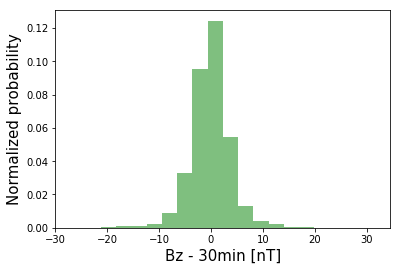

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdat
import matplotlib.mlab as mlab, mpld3

# Choose the feature to plot
#      NOTE: you can input any of the column names from 'ml_db'
feature_i = ml_db.columns.get_loc('Bz - 30min [nT]')
num_bins = 20

fig = plt.figure()
# fig.set_size_inches(8,10)
plt.hist(X[:,feature_i], num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel(feature_labels[feature_i], fontsize=15)#, labelpad=-30)
plt.ylabel('Normalized probability', fontsize=15)#, labelpad=-30)
plt.show()
    
    


#### Distributions of positive and negative classes by individual input feature

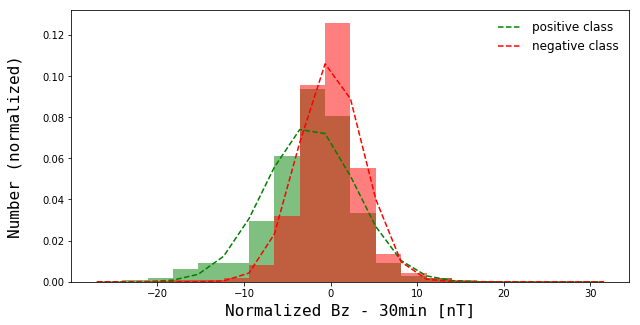

In [5]:
# Examine distribution of one feature for the positive and negative class 

# Separate the positive and negative classes
idx_pos_class = np.squeeze( np.argwhere(y > 0.1) )
idx_neg_class = np.squeeze( np.argwhere(y <= 0.1) )
X_pos_class = np.copy(X)
X_pos_class = X[idx_pos_class,:]
X_neg_class = np.copy(X)
X_neg_class = X[idx_neg_class,:]
y_pos_class = np.copy(y)
y_pos_class = y[idx_pos_class]
y_neg_class = np.copy(y)
y_neg_class = y[idx_neg_class]

# choose the feature to plot
feature_i = ml_db.columns.get_loc('Bz - 30min [nT]')

num_bins = 20

# For the positive class
mu_scint = np.mean(X_pos_class[:,feature_i])
sigma_scint = np.std(X_pos_class[:,feature_i])
n_scint, bins_scint, patches_scint = plt.hist(X_pos_class[:,feature_i], num_bins, normed=1, facecolor='green', alpha=0.5)
y_scint  = mlab.norm.pdf(bins_scint, mu_scint, sigma_scint)
plt.plot(bins_scint, y_scint, 'g--',label='positive class')

# For the negative class
mu_noscint = np.mean(X_neg_class[:,feature_i])
sigma_noscint = np.std(X_neg_class[:,feature_i])
n_noscint, bins_noscint, patches_noscint = plt.hist(X_neg_class[:,feature_i], num_bins, normed=1, facecolor='red', alpha=0.5)
y_noscint  = mlab.norm.pdf(bins_noscint, mu_noscint, sigma_noscint)
plt.plot(bins_noscint, y_noscint, 'r--',label='negative class')


text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
plt.xlabel('Normalized '+feature_labels[feature_i],**text_style)
plt.ylabel('Number (normalized)', labelpad=20,**text_style)
fig = plt.gcf()
fig.set_size_inches(10,5)
#fig.savefig('featureDist_tmp.png',bbox_inches='tight')
legend = plt.legend(loc='upper right', fontsize=12, framealpha=0.0,title='')
#legend.get_frame().set_linewidth(0.0)
mpld3.enable_notebook()
plt.show()

# NOTE: the smaller the difference between features, the less helpful they are to the prediction
#     Try varying 'feature_i' to see which features are useless

## Step 3: Input feature selection 

NOTE: This step may take roughly three hours (judged using Mac 2.6 GHz Intel Core i7 machine). Here is the output from a previous evaluation of the feature selection algorithm: 

       CPU times: user 2h 56min 50s, sys: 9min 37s, total: 3h 6min 28s
       Wall time: 3h 6min 31s

number of selected features = 25
[ 1.09947677  1.10297638  1.06421947  1.31496273  1.06887737  1.52599307
  1.53485315  1.53737494  1.24615812  1.24599368  1.24395107  1.15054259
  1.15448392  1.15763263  1.5557883   1.55384408  1.55845813  2.00312905
  2.10137823  2.17030351  1.58726344  1.5995239   1.61120943  0.88005718
  0.87193584  0.86945365  1.99384039  2.01314053  2.04182759  1.10889267
  1.15467842  1.20312287  1.80807842  1.10323435  1.91774916  2.22863842
  2.47390683  1.92082455  2.24680201  2.33236914  1.42284365  1.37082677
  1.02011598  1.00754248  1.46513361  1.37318223  1.11137108  1.9397745
  1.23046477  3.03546661  1.29557806  3.32709783]
[['Bz - 30min [nT]']
 ['Bz - 15min [nT]']
 ['Bz - 0min [nT]']
 ['Psw - 30min [nPa]']
 ['Psw - 15min [nPa]']
 ['Psw - 0min [nPa]']
 ['AE - 30min [nT]']
 ['AE - 15min [nT]']
 ['AE - 0min [nT]']
 ['SymH - 30min [nT]']
 ['SymH - 15min [nT]']
 ['SymH - 0min [nT]']
 ['Newell CF - 30min [m/s^(4/3) T^(2/3)]']
 ['Newell CF - 15min [m/s^(4/3)

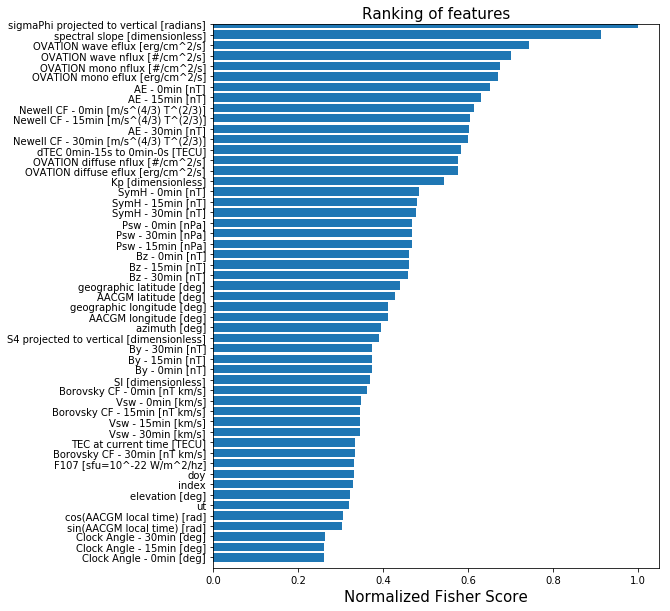

CPU times: user 3h 34min 8s, sys: 58.1 s, total: 3h 35min 6s
Wall time: 3h 36min 13s


In [6]:
%%time

from sklearn.feature_selection import SelectKBest, f_classif

# specify the number of features to keep based on univariate analysis of variance F-score
numFeatures = 25
fSelect_model = SelectKBest(score_func=f_classif, k=numFeatures)
X_fSelect = fSelect_model.fit_transform(X,y) 
    # FIT: Run score function on (X, y) and get the appropriate features
    # TRANSFORM: Reduce X to the selected features
print( 'number of selected features = {0}'.format(np.shape(X_fSelect)[1]) )

scores = fSelect_model.scores_
print(scores)

selected_feature_labels = feature_labels[np.argwhere(fSelect_model.get_support() == True)]
print(selected_feature_labels)

print('f_classif is an ANOVA F-test to determine \n  the probability that the means of the \n  input variables are the same as the mean \n  of the target variable')
print('The higher the value, the greater \n  the probability that the two means are different')
print('.....And, therefore, the more information \n    that variable provides on the target variable\n\n')

print('the F-test ignores correlations between the variables and is, therefore, \n    a univariate feature selection algorithm')

# Examine the selected features more intuitively 
#     It's not easy to interpret the scores in this fashion, so let's plot the results
scores[np.isnan(scores)] = 0.
mpld3.disable_notebook()
plt.clf()
order = np.argsort(scores)
orderedfeaturelabels = [feature_labels[i] for i in order]
y_pos2 = np.arange(len(feature_labels))
plt.barh(y_pos2, sorted(scores/np.max(scores)), align='center')
plt.ylim((-1, numFeatures))
plt.yticks(y_pos2, orderedfeaturelabels)
plt.xlabel('Normalized Fisher Score', fontsize=15)
plt.title('Ranking of features', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(8,10)
#fig.savefig('features_FisherScores.png',bbox_inches='tight')
plt.show()

## Step 4: Support Vector Machine (SVM) training


In [7]:
%%time

from sklearn import svm
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

# Convert y to binary values (1=scintillation; 0=no-scintillation)
y[y>scint_thresh] = 1
y[y<=scint_thresh] = 0



# Set a desired number of data samples with which to train SVM
numsamples = 50000

# Set a random seed for reproducibility
randomseed = 5

# Separate data into training and testing data
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X_fSelect, y, 
                                                                                 range(len(y)),
                                                                                 train_size=numsamples,
                                                                                 random_state=randomseed)

# Create input data scaler based only on training set
scaler_X = RobustScaler()
scaler_X = scaler_X.fit(X_train)

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Create the SVM model
clf = svm.SVC(kernel='rbf',C=0.1,gamma=0.01,class_weight={1:50},probability=True)

clf.fit(X_train_scaled,y_train)



//anaconda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


CPU times: user 10min 11s, sys: 9.11 s, total: 10min 20s
Wall time: 10min 22s


## Step 5: SVM evaluation

We use a variety of evaluation metrics to gauge model performance, but emphasize the Total Skill Score (TSS) here due to its insensitivity on class imbalance ratio [[Bloomfield et al., 2012](http://iopscience.iop.org/article/10.1088/2041-8205/747/2/L41/meta "Bloomfield - TSS")]. All metrics require the use of the entries of the contingency, or confusion matix. For the scintillation/no-scintillation classification problem the matrix is https://github.com/rmcgranaghan/machine-learning-with-GNSS-data/blob/master/confusion_matrix_schematic.png. 



In [8]:
# Function to calculate the confusion matrix entries
def confusion_table(true, pred):
    """
    computes the number of TP, TN, FP, FN events given the arrays with observations and predictions
    and returns the true skill score
  
    Args:
    true: np array with observations (1 for scintillation, 0 for nonscintillation)
    pred: np array with predictions (1 for scintillation, 0 for nonscintillation)
  
    Returns: true negative, false positive, true positive, false negative
    """  
    Nobs = len(pred)
    TN = 0.; TP = 0.; FP = 0.; FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and true[i] == 0):
            TN += 1
        elif (pred[i] == 1 and true[i] == 0):
            FP += 1
        elif (pred[i] == 1 and true[i] == 1):
            TP += 1 
        elif (pred[i] == 0 and true[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN,FP,TP,FN

In [9]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=20) 
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)#,fontsize=22, weight='bold')
    plt.yticks(tick_marks, classes)#,fontsize=22, weight='bold')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=22, weight='bold')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[3123127 1154453]
 [  16503  121763]]


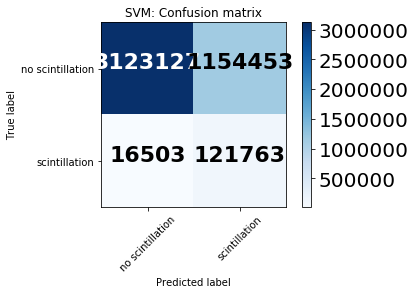

Normalized confusion matrix
[[ 0.73011539  0.26988461]
 [ 0.11935689  0.88064311]]


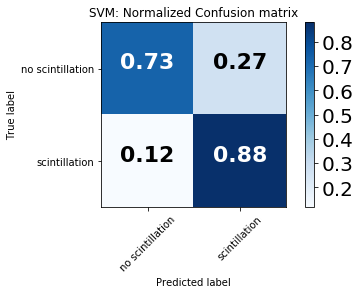

In [12]:
%%time

# Test and evaluate
pred = clf.predict(X_test_scaled)

TN,FP,TP,FN = confusion_table(y_test,pred)

# Calculate the predictive metrics
TSS = (TP/(TP+FN) - FP/(FP+TN))

AUC_PRC = (average_precision_score(y_test,pred))

precision = ( TP/(TP+FP) )

recall = ( TP/(TP+FN) )

specificity = ( TN/(TN+FP) )

F1 = ( 2*((precision*recall)/(precision+recall)) )

confusion_matrix_svm = confusion_matrix(y_test, pred)

confusion_matrix_class_names = ['no scintillation','scintillation']
fig1 = plt.figure()
plot_confusion_matrix(confusion_matrix_svm, classes=confusion_matrix_class_names, normalize=False,
                              title='SVM: Confusion matrix')
plt.show()


fig2 = plt.figure()
plot_confusion_matrix(confusion_matrix_svm, classes=confusion_matrix_class_names, normalize=True,
                          title='SVM: Normalized Confusion matrix')
plt.show()


### Determine sensitivity to input training sample

NOTE: Each evaluation in the block below will take approximately one hour

In [27]:
%%time

# Benchmark the SVM model
clf = svm.SVC(kernel='rbf',C=0.1,gamma=0.01,class_weight={1:50},probability=True)

# Set the number of samples to use for SVM model training on each loop
numsamples = 50000

# Set a subset of samples to be predicted to speed up execution of this block
numpredsamples = 50000


# Set the number of independent SVM models to train
num_evals = 10

# Specify save array for total skill score (TSS)
array_of_TSS = np.zeros(num_evals)

# Loop over number of evaluations, fit model, and calculate benchmark scores
ctr = 0
randomseed = 0
for e in range(num_evals):
    print('working on eval = {0}'.format(e))
    print( 'current time = {0}'.format(datetime.datetime.now().time()) )
    print('progress = {0}'.format( (e/float(num_evals))*100 ))
    

    # Set a different random seed on each loop
    randomseed += 1
    print('seed for random generator on eval {0} = {1}'.format(e,randomseed))    

    # Separate data into training and testing data
    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X_fSelect, y, 
                                                                                     range(len(y)),
                                                                                     train_size=numsamples,
                                                                                     random_state=randomseed)
    
    print('size of testing data = {0}x{1}'.format(np.shape(X_test)[0],np.shape(X_test)[1]))
    print('size of training data = {0}x{1}'.format(np.shape(X_train)[0],np.shape(X_train)[1]))
    print('')
    print('--------------------------------------------------------------------------------')
    
    # Create input data scaler based only on training set
    scaler_X = RobustScaler()
    scaler_X = scaler_X.fit(X_train)

    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Fit the model to the training data
    clf.fit(X_train_scaled,y_train)
    
    pred = clf.predict(X_test_scaled[0:numpredsamples])
    
    TN,FP,TP,FN = confusion_table(y_test[0:numpredsamples], pred)
    
    if (((TP+FN) == 0.0) or (FP+TN)==0.0):
        array_of_TSS[ctr] = -1.0
    else:
        array_of_TSS[ctr] = TP/(TP+FN) - FP/(FP+TN)
    
    print('TSS for eval {0} = {1}'.format(e,array_of_TSS[ctr]))

    ctr += 1
    

working on eval = 0
current time = 22:44:27.343090
progress = 0.0
seed for random generator on eval 0 = 1
size of testing data = 4415846x25
size of training data = 50000x25

--------------------------------------------------------------------------------
TSS for eval 0 = 0.608818007852
working on eval = 1
current time = 22:55:15.283790
progress = 10.0
seed for random generator on eval 1 = 2
size of testing data = 4415846x25
size of training data = 50000x25

--------------------------------------------------------------------------------
TSS for eval 1 = 0.607159633327
working on eval = 2
current time = 23:06:09.363322
progress = 20.0
seed for random generator on eval 2 = 3
size of testing data = 4415846x25
size of training data = 50000x25

--------------------------------------------------------------------------------
TSS for eval 2 = 0.599259167496
working on eval = 3
current time = 23:16:46.806083
progress = 30.0
seed for random generator on eval 3 = 4
size of testing data = 4415846

ValueError: unrecognized kwargs: ['xmin']

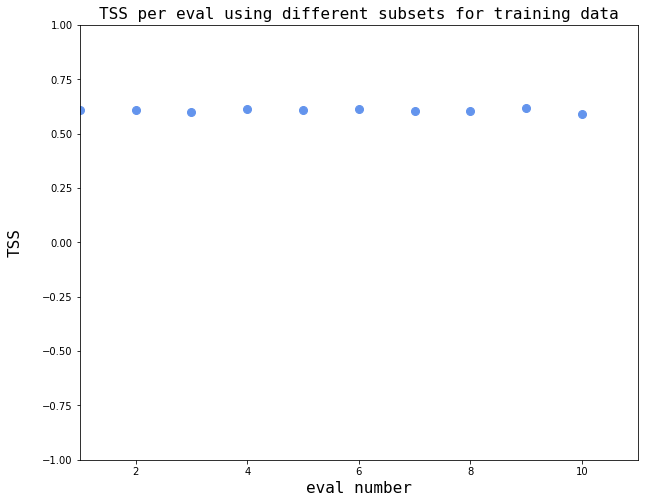

In [36]:
# Visualize the output
fig, ax = plt.subplots(figsize=(10,8))
plt.xlim(xmax = np.max(num_evals)+1, xmin = 1)
plt.ylim(ymin = -1, ymax = 1)

# label the axes and the plot
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
cornblue  = (0.39,0.58,0.93,1.0)            # create a cornflower-blue color
marker_style_blue = dict(linestyle='', markersize=8, fillstyle='full',color=cornblue,markeredgecolor=cornblue)
ax.plot(range(1,num_evals+1), array_of_TSS,'o',**marker_style_blue)
ax.set_xlabel('eval number',**text_style)
ax.set_ylabel('TSS',labelpad=20,**text_style)
ax.grid(color='k')
plt.title(r'TSS per eval using different subsets for training data',**text_style)
fig = plt.gcf()

plt.show()

### Load data from 2016 and examine SVM model generalizability by examining predictions for January 15-25, 2016 period

(126426, 68)
shape X pre-transform = 126426x52
shape X post-transform = 126426x25
Confusion matrix, without normalization
[[90488 31609]
 [ 1091  3238]]


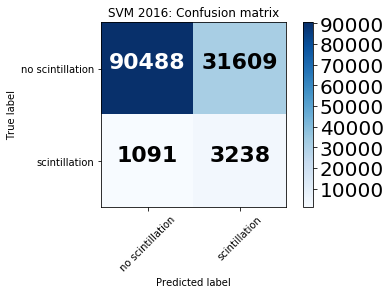

In [60]:
ml_db_2016 = pd.read_csv(os.path.join('/Users/ryanmc/Documents/gnss_dswg_pp_data/classificationExplorationOutput/','ml_db_2016_NaNsDropped.csv'))
# Drop two saved index columns
ml_db_2016 = ml_db_2016.drop(columns=ml_db_2016.columns[0:1]) 

date_limits = [datetime.datetime(2016,1,15), datetime.datetime(2016,1,25)]
doy_limits = [date_limits[0].timetuple().tm_yday, date_limits[1].timetuple().tm_yday]
doy_mask_Jan15 = (ml_db_2016['doy']>=doy_limits[0])
doy_mask_Jan25 = (ml_db_2016['doy']<=doy_limits[1])

ml_db_2016 = ml_db_2016[ doy_mask_Jan15 & doy_mask_Jan25 ]

print(np.shape(ml_db_2016))


# Drop columns not used in our predictive task
cols_to_remove = ['datetime',
                   'CHAIN station',
                   'CHAIN station model',
                   'CHAIN station ID number',
                   'AACGM local time [hr]',
                   'sigmaPhi [radians]',
                   'S4 [dimensionless]',
                   'datetime at prediction time',
                   'ut at prediction time [sec]',
                   'doy at prediction time [sec]',
                   'TEC at prediction time [TECU]',
                   'dTEC at prediction time [TECU]',
                   'S4 at prediction time [dimensionless]',
                   'S4 projected to vertical at prediction time [dimensionless]',
                   'sigmaPhi at prediction time [radians]']

ml_db_2016 = ml_db_2016.drop(np.array(cols_to_remove),axis=1)

# Separate the ML DB into input (X) and label (y)
predicted_label = 'sigmaPhi projected to vertical at prediction time [radians]'
predicted_column = ml_db_2016.columns.get_loc(predicted_label)
X_2016 = ml_db_2016.loc[:, ml_db_2016.columns != predicted_label].values
feature_labels = ml_db_2016.loc[:, ml_db_2016.columns != predicted_label].columns.values
y_2016 = ml_db_2016[predicted_label].values

# Convert y to binary values (1=scintillation; 0=no-scintillation)
y_2016[y_2016>scint_thresh] = 1
y_2016[y_2016<=scint_thresh] = 0

# Apply the F-Select results
X_2016_fSelect = fSelect_model.transform(X_2016)
mask_features = fSelect_model.get_support()
print('shape X pre-transform = {0}x{1}'.format(np.shape(X_2016)[0],np.shape(X_2016)[1]))
X_2016_fSelect = X_2016[:,mask_features]
print('shape X post-transform = {0}x{1}'.format(np.shape(X_2016_fSelect)[0],np.shape(X_2016_fSelect)[1]))

# Use the scaling from the original training data to emulate an operational forecasting scenario
X_scaled_2016 = scaler_X.transform(X_2016_fSelect)

pred_2016 = clf.predict(X_scaled_2016)



#### Take a look at the confusion matrix to understand model performance


Confusion matrix, without normalization
[[90488 31609]
 [ 1091  3238]]


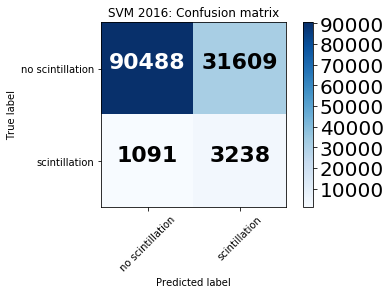

Normalized confusion matrix
[[ 0.74111567  0.25888433]
 [ 0.25202125  0.74797875]]


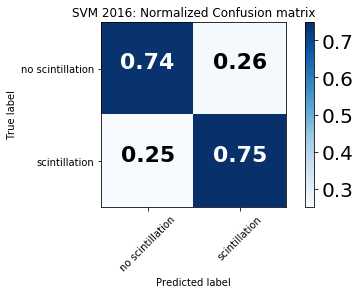

In [62]:
TN,FP,TP,FN = confusion_table(y_2016,pred_2016)

# Calculate the predictive metrics
TSS = (TP/(TP+FN) - FP/(FP+TN))

confusion_matrix_svm_2016 = confusion_matrix(y_2016, pred_2016)

confusion_matrix_class_names = ['no scintillation','scintillation']
fig1 = plt.figure()
plot_confusion_matrix(confusion_matrix_svm_2016, classes=confusion_matrix_class_names, normalize=False,
                              title='SVM 2016: Confusion matrix')
plt.show()

fig2 = plt.figure()
plot_confusion_matrix(confusion_matrix_svm_2016, classes=confusion_matrix_class_names, normalize=True,
                              title='SVM 2016: Normalized Confusion matrix')
plt.show()

For binary prediction there are four quadrants in the confusion matrix:
1. True negatives (upper left quadrant): no scintillation is observed and correctly predicted
2. False positives (upper right quadrant): no scintillation is observed yet the model predicts scintillation
3. False negatives (bottom left quadrant): scintillation is observed yet the model predicts no scintillation
4. True positives (bottom right quadrant): scintillation is observed and correctly predicted

A perfect model will yield 100% in the upper left and bottom right quadrants. 

In these results, the model shows high accuracy both in predicting when scintillation occurred (75%) and when no scintillation occurred (74%), indicating skillful scintillation prediction. 

## References

Aarons, J., & Basu, S. (1994). Ionospheric amplitude and phase fluctuations at the GPS frequencies. In Proceedings of the 7th International Technical Meeting of the Satellite Division of The Institute of Navigation (ION GPS 1994), The Institute of Navigation, pp. 1569–1578.

Basu, S., MacKenzie, E., & Basu, S. (1988). Ionospheric constraints on VHF/UHF communications links during solar maximum and minimum periods. Radio Science, 23(3), 363–378. https://doi.org/10.1029/RS023i003p00363.

Beutler, G., Rothacher, M., Schaer, S., Springer, T., Kouba, J., & Neilan, R. (1999). The International GPS Service (IGS): An interdisciplinary service in support of Earth sciences. Advances in Space Research, 23(4), 631–653. https://doi.org/10.1016/S0273-1177(99)00160-X, satellite Dynamics, Orbit Analysis and Combination of Space Techniques.

Cherniak, I., Krankowski, A., & Zakharenkova, I. (2014). Observation of the ionospheric irregularities over the Northern Hemisphere: Methodology and service. Radio Science, 49, 653–662. https://doi.org/10.1002/2014RS005433.

Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine Learning, 20(3), 273–297. https://doi.org/10.1007/BF00994018.

Coster, A., & Komjathy, A. (2008). Space weather and the global positioning system. Space Weather, 6, S06D04.
https://doi.org/10.1029/2008SW000400.

Duderstadt, J. J. (2001). Issues for science and engineering researchers in the digital age. Washington, DC: National Academy Press.

Kintner, P. M. (2001). Fading timescales associated with GPS signals and potential consequences. Radio Science, 36(4), 731–743. https://doi.org/10.1029/1999RS002310.

Kintner, P. M., Ledvina, B. M., & de Paula, E. R. (2007). GPS and ionospheric scintillations. Space Weather, 5, S09003. https://doi.org/10.1029/2006SW000260.

McGranaghan, R.M., A.J. Mannucci, B.D Wilson, C.A. Mattmann, and R. Chadwick. (2018), New capabilities for prediction of high‐latitude ionospheric scintillation: A novel approach with machine learning, Space Weather, 16. https://doi.org/10.1029/2018SW002018.

Ren, X., Zhang, X., Xie, W., Zhang, K., Yuan, Y., & Li, X. (2016). Global ionospheric modelling using multi-GNSS: BeiDou, Galileo, GLONASS and GPS. Scientific Reports, 6(1), 33499. https://doi.org/10.1038/srep33499.

Rizos, C., Montenbruck, O., Weber, G. R., Weber, R., & Neilan, U. H. (2013). The IGS MGEX experiment as a milestone for a comprehensive multi-GNSS service. In Proceedings of the ION 2013 Pacific PNT Meeting, The Institute of Navigation, pp. 289–295.

Sadlier, G., Flytkjær, R., Sabri, F., & Herr, D. (2017). The economic impact on the UK of a sisruption to GNSS. Innovate UK, UK Space Agency: Royal Institute of Navigation.

Tzelepis, C., & Carreno, A. (2016). Concepts for NASA’s Communication and Navigation Architecture in Near Earth and Deep Space Domains; Strategies for affordable and scalable implementation of next generation relay systems with improved mission experience and reduced burden. In 34th AIAA International Communications Satellite Systems Conference. https://doi.org/10.2514/6.2016-5706.

